# Name of the Student : Aagam Manish Shah

# USC ID Number: 8791018480

# 3.1 The LASSO and Boosting for Regression

In [2]:
import csv
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import math
from math import sqrt, floor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LassoCV

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

import xgboost as xgb
import matplotlib.pyplot
from sklearn.model_selection import GridSearchCV

## (a) Download the Communities and Crime data from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.

In [2]:
Input_data_description = open("communities.names","r") 
print(Input_data_description.read())

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

In [3]:
Input_data = pd.read_csv(r'communities.data', header = None)
Input_data.columns = ["state","county","community","communityname string","fold","population","householdsize","racepctblack",
                      "racePctWhite","racePctAsian","racePctHisp","agePct12t21","agePct12t29","agePct16t24","agePct65up",
                      "numbUrban","pctUrban","medIncome","pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst",
                      "pctWRetire","medFamInc","perCapInc","whitePerCap","blackPerCap","indianPerCap","AsianPerCap",
                      "OtherPerCap","HispPerCap","NumUnderPov","PctPopUnderPov","PctLess9thGrade","PctNotHSGrad",
                      "PctBSorMore","PctUnemployed","PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu",
                      "PctOccupMgmtProf","MalePctDivorce","MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam",
                      "PctFam2Par","PctKids2Par","PctYoungKids2Par","PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg",
                      "PctIlleg","NumImmig","PctImmigRecent","PctImmigRec5","PctImmigRec8","PctImmigRec10","PctRecentImmig",
                      "PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly","PctNotSpeakEnglWell","PctLargHouseFam",
                      "PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous","PctPersOwnOccup",
                      "PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup","PctHousOwnOcc",
                      "PctVacantBoarded","PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone","PctWOFullPlumb","OwnOccLowQuart",
                      "OwnOccMedVal","OwnOccHiQuart","RentLowQ","RentMedian","RentHighQ","MedRent","MedRentPctHousInc",
                      "MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters","NumStreet","PctForeignBorn",
                      "PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85","LemasSwornFT","LemasSwFTPerPop",
                      "LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq","LemasTotReqPerPop","PolicReqPerOffic",
                      "PolicPerPop","RacialMatchCommPol","PctPolicWhite","PctPolicBlack","PctPolicHisp","PctPolicAsian",
                      "PctPolicMinor","OfficAssgnDrugUnits","NumKindsDrugsSeiz","PolicAveOTWorked","LandArea","PopDens",
                      "PctUsePubTrans","PolicCars","PolicOperBudg","LemasPctPolicOnPatr","LemasGangUnitDeploy",
                      "LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop"]
Input_data

,state,county,community,communityname string,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [4]:
Train_dataset = Input_data.loc[0:1494, :]
# Train_dataset
X_train = Train_dataset.iloc[:,:-1]
# X_train
y_train = Train_dataset.iloc[:,-1]
# y_train

In [5]:
Test_dataset = Input_data.loc[1495:,:]
# Test_dataset
X_test = Test_dataset.iloc[:,:-1]
# X_test
y_test = Test_dataset.iloc[:,-1]
# y_test

## (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

Only Predictive Features

In [6]:
Predictive_dataset = Input_data.iloc[:,5:]
# Predictive_dataset 
X_data = Predictive_dataset.iloc[:,:-1]
# X_data
y_data = Predictive_dataset.iloc[:,-1]
# y_data

In [7]:
# Convert ? to nan values
X_data = X_data.replace('?', np.nan)

# Find which column has nan values 
missingValueColumnIndex = X_data.columns[X_data.isnull().any()]

# Get the count of nan values per column
analyse = X_data[missingValueColumnIndex].describe()
print(analyse)

# Imputing only columns having NaN values

# Impute the column which has less number of missing values
col_name = 'OtherPerCap'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_data[[col_name]])
X_data[[col_name]] = imputer.transform(X_data[[col_name]])

# Again find that finally now how many columns are imputed and how many are not
missingValueColumnIndex = X_data.columns[X_data.isnull().any()]

# Drop the columns which has large number of missing values
X_data = X_data.dropna(axis=1)

       OtherPerCap LemasSwornFT LemasSwFTPerPop LemasSwFTFieldOps  \
count         1993          319             319               319   
unique          97           38              52                34   
top              0         0.02             0.2              0.98   
freq           129           80              19                81   

       LemasSwFTFieldPerPop LemasTotalReq LemasTotReqPerPop PolicReqPerOffic  \
count                   319           319               319              319   
unique                   55            44                59               75   
top                    0.19          0.02              0.14             0.23   
freq                     17            55                23               15   

       PolicPerPop RacialMatchCommPol  ... PctPolicAsian PctPolicMinor  \
count          319                319  ...           319           319   
unique          52                 76  ...            50            72   
top            0.2             

In [8]:
Imputed_train_dataset = X_data.loc[0:1494,:]
# Imputed_train_dataset
Imputed_X_train = Imputed_train_dataset.iloc[:,:-1]
# Imputed_X_train
Imputed_y_train = Imputed_train_dataset.iloc[:,-1]
# Imputed_y_train

In [9]:
Imputed_test_dataset = X_data.loc[1495:,:]
# Imputed_test_dataset
Imputed_X_test = Imputed_test_dataset.iloc[:,:-1]
# Imputed_X_test
Imputed_y_test = Imputed_test_dataset.iloc[:,-1]
# Imputed_y_test

After Data Imputation (mean strategy), we only have 22 columns has missing value.
Finally, I will be using X_data in the shape of (1994, 100) to training algorithm.

## (c) Plot a correlation matrix for the features in the data set.

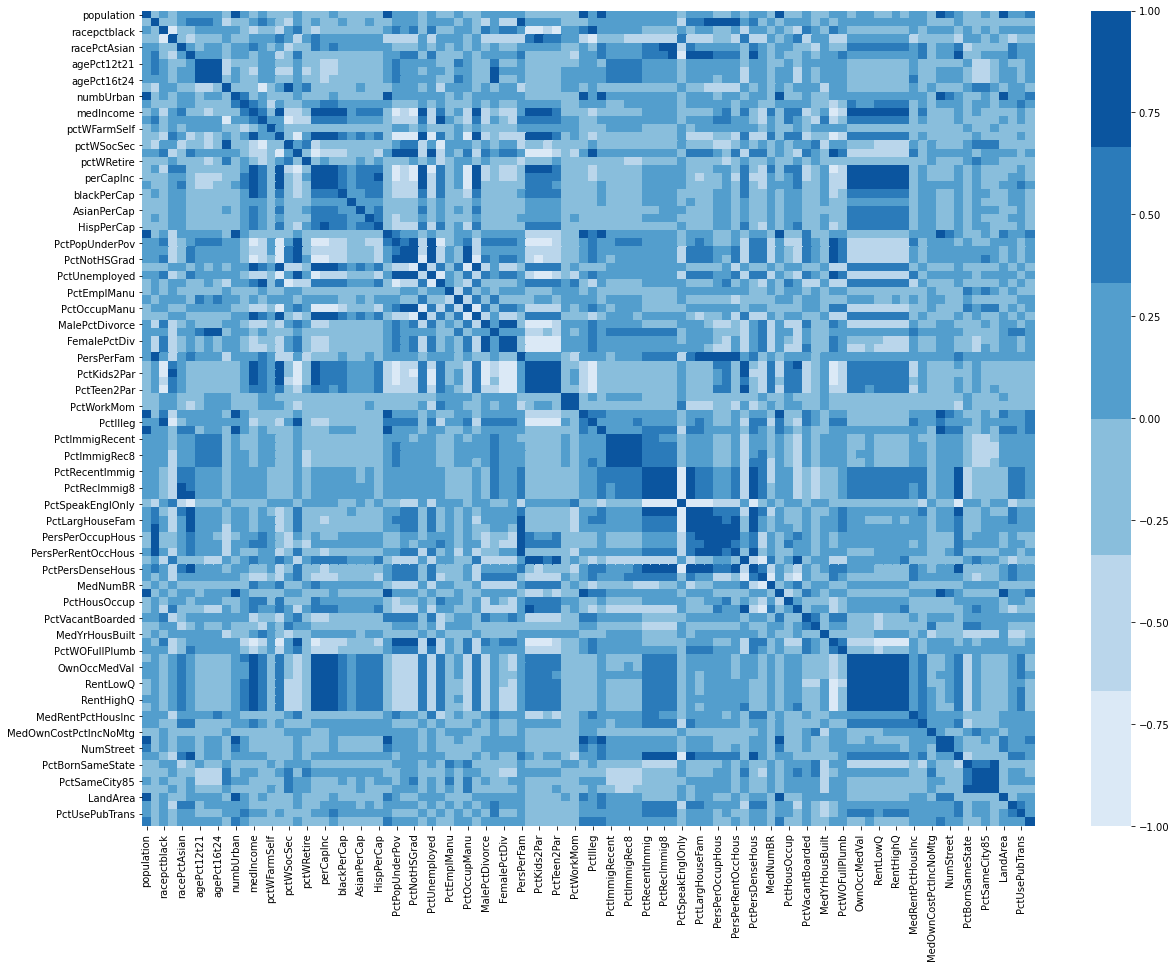

In [11]:
corrMatrix = X_data.corr()
fig = plt.figure(figsize=(20, 15))
sns.heatmap(corrMatrix, vmin=-1, vmax=1, cmap=sns.color_palette("Blues"))
plt.show()

## (d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m, in which s is sample standard deviation and m is sample mean.

In [12]:
coeff_of_var_formula =  lambda x: np.std(x) / np.mean(x)
cv_result = np.apply_along_axis(coeff_of_var_formula, axis=0, arr=X_data.to_numpy())
cv_result

array([2.20294993, 0.3532097 , 1.41056656, 0.32370036, 1.35882134,
       1.61387296, 0.36574812, 0.29061999, 0.49503634, 0.42333552,
       2.00124163, 0.63868866, 0.579608  , 0.32762787, 0.69985456,
       0.35914986, 0.36842021, 0.6988552 , 0.3495514 , 0.52759954,
       0.54549659, 0.5074249 , 0.58932117, 0.80948203, 0.60604183,
       0.67047639, 0.47384086, 2.30439167, 0.75379109, 0.67543079,
       0.52815378, 0.57825579, 0.55599333, 0.34724014, 0.5104523 ,
       0.39812581, 0.5083338 , 0.422     , 0.39548416, 0.40371035,
       0.3591826 , 0.371375  , 0.31687526, 0.33052823, 0.3323925 ,
       0.32934323, 0.32846855, 0.33616412, 0.33263868, 2.99344555,
       0.91957222, 2.89976977, 0.6840295 , 0.58474358, 0.50478324,
       0.45555177, 1.29977426, 1.29730638, 1.28091166, 1.28371176,
       0.28860078, 1.45870069, 0.73435052, 0.75691886, 0.36682182,
       0.31932719, 0.46833631, 0.3502283 , 1.1269169 , 0.34828327,
       0.81068443, 1.9582885 , 0.26957935, 0.33745632, 1.06447

## (e) Pick sqrt(128) features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

Index(['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig',
       'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'numbUrban',
       'HousVacant', 'LandArea', 'racePctHisp'],
      dtype='object')


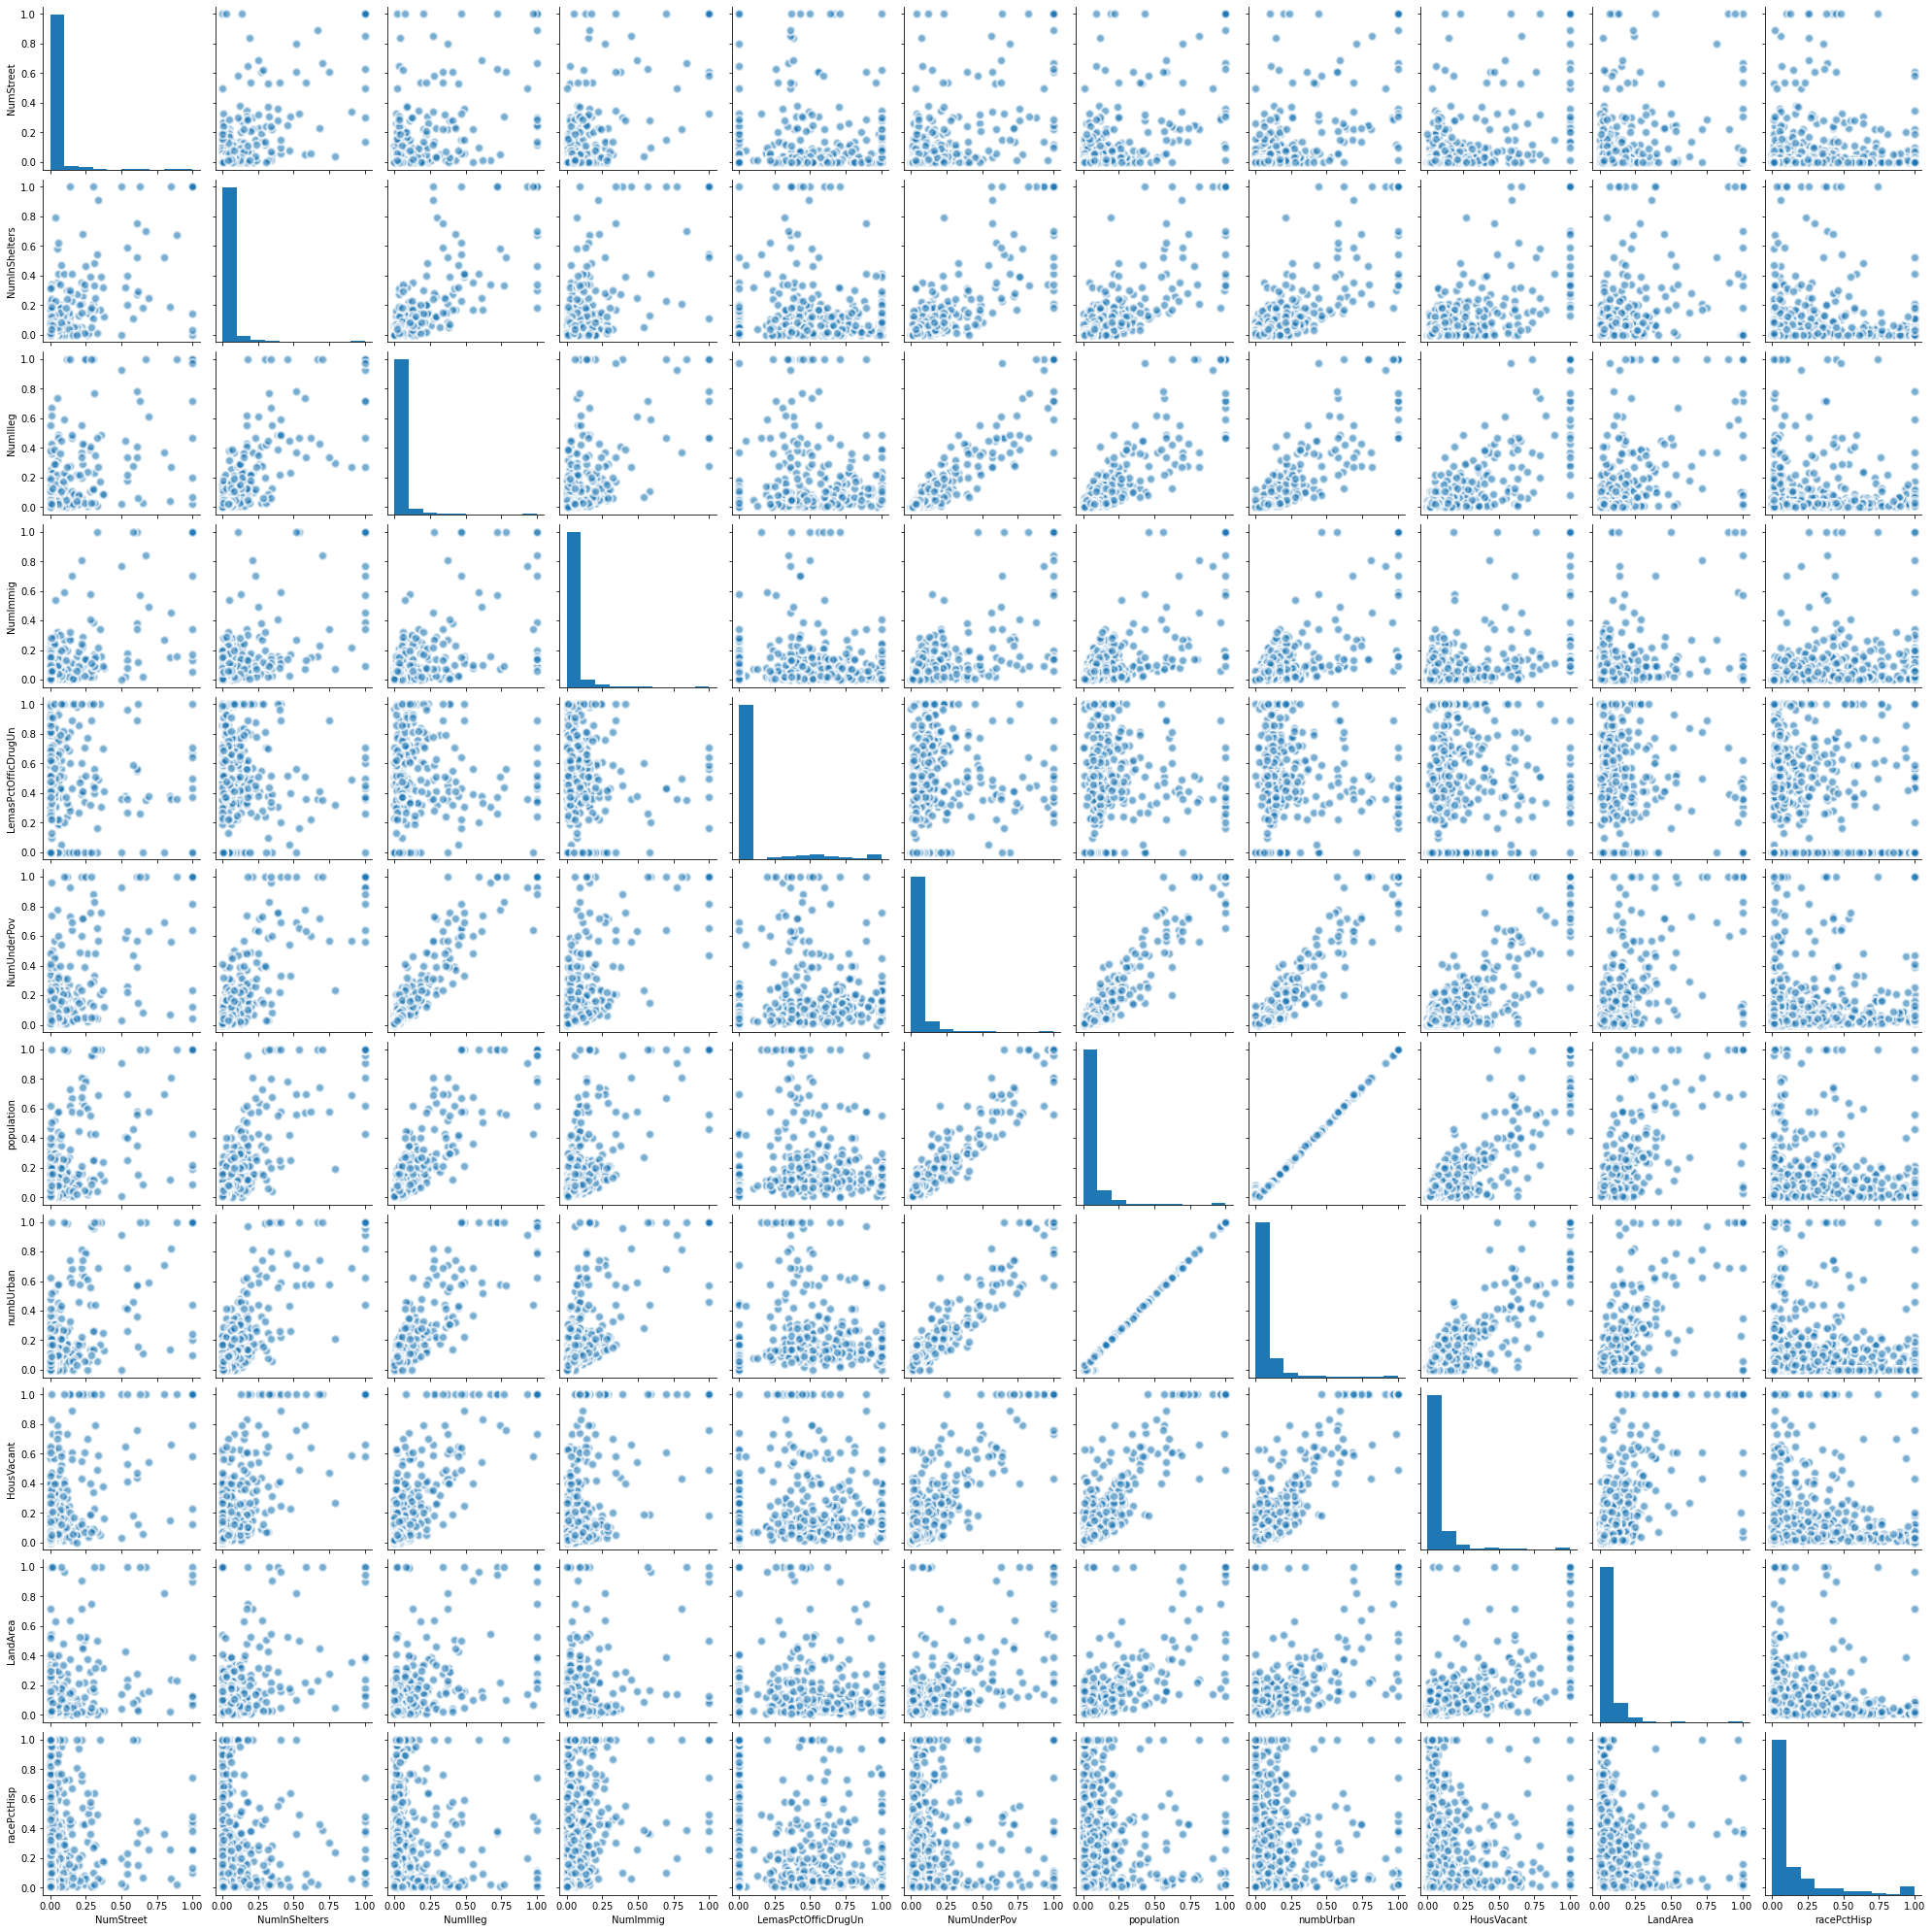

In [13]:
top_sqrt_128_features = floor(sqrt(128))
cv_resultIndexes = np.argsort(-cv_result)[:top_sqrt_128_features]
colname_highest_cv = X_data.columns[cv_resultIndexes]
high_cv_data = X_data[colname_highest_cv]
print(colname_highest_cv)
sns.pairplot(high_cv_data, plot_kws=dict(s=80, edgecolor="white", linewidth=2.5, alpha=0.6))
plt.show()

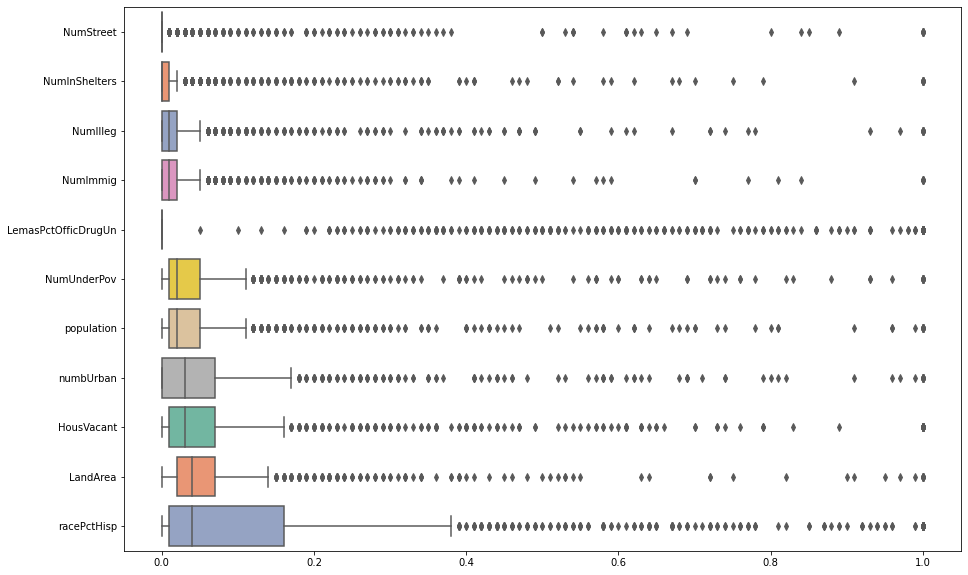

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(data=high_cv_data, orient="h", palette="Set2")

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=1495, random_state=2333)

## (f) Fit a linear model using least squares to the training set and report the test error.

In [16]:
linReg = LinearRegression().fit(X_train, y_train)
y_predict = linReg.predict(X_test)
print("-----------\"Mean Squared Error\"-------------")
print("Mean Squared Error : ", mean_squared_error(y_test, y_predict))
print("-----------\"Score\"-------------")
print("Score : ", linReg.score(X_test, y_test))

-----------"Mean Squared Error"-------------
Mean Squared Error :  0.019183263776179134
-----------"Score"-------------
Score :  0.6458883541729513


## (g) Fit a ridge regression model on the training set, with lambda chosen by cross validation. Report the test error obtained.

In [17]:
def RidgeRegressionCV():
    return Pipeline([('std_scaler', StandardScaler()),('ridge_reg', RidgeCV(cv=10))])

ridgeCV = RidgeRegressionCV().fit(X_train, y_train)
y_predict = ridgeCV.predict(X_test)
print("-----------\"Mean Square Error\"-------------")
print("Mean Square Error : ", mean_squared_error(y_test, y_predict))
print("-----------\"Score\"-------------")
print("Score : ", ridgeCV.score(X_test, y_test))

-----------"Mean Square Error"-------------
Mean Square Error :  0.01894371613119307
-----------"Score"-------------
Score :  0.6503102613004206


## (h) Fit a LASSO model on the training set, with lambda chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.

In [11]:
def LassoRegressionCV():
    return Pipeline([('std_scaler', StandardScaler()),('lasso_cv', LassoCV(cv=10, random_state=2333))])

lasso_normalized_reg = LassoCV(cv=10, random_state=2333).fit(X_train, y_train)
y_predict = lasso_normalized_reg.predict(X_test)
print("-----------\"Mean Square Error(Normalized)\"-------------")
print("Mean Square Error : ", mean_squared_error(y_test, y_predict))
print("-----------\"Score\"-------------")
print("Score : ", lasso_normalized_reg.score(X_test, y_test))

lasso_Standardized_Reg = LassoRegressionCV().fit(X_train, y_train)
y_predict = lasso_Standardized_Reg.predict(X_test)
print("-----------\"Mean Square Error(Standardized)\"-------------")
print("Mean Square Error : ", mean_squared_error(y_test, y_predict))
print("-----------\"Score\"-------------")
print("Score : ", lasso_Standardized_Reg.score(X_test, y_test))

-----------"Mean Square Error(Normalized)"-------------
Mean Square Error :  0.018881207494723426
-----------"Score"-------------
Score :  0.6514641335714235
-----------"Mean Square Error(Standardized)"-------------
Mean Square Error :  0.018833323423590845
-----------"Score"-------------
Score :  0.6523480450598698


## (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [19]:
linReg = LinearRegression()
mse = list()
score = -1 * cross_val_score(linReg, np.ones((len(X_train), 1)), y_train, cv=10, scoring='neg_mean_squared_error').mean()
mse.append(score)

for m in range(1, X_data.shape[1]):
    pca = PCA(n_components=m)
    X_train_reduced = pca.fit_transform(scale(X_train))
    mse.append(-1 * cross_val_score(linReg, X_train_reduced, y_train, cv=10, scoring='neg_mean_squared_error').mean())

bestM = np.argsort(mse)[0]
print("-----------\"Best M\"-------------")
print("Best M : ", bestM)
pca = PCA(n_components=bestM)
X_train_reduced = pca.fit_transform(scale(X_train))
X_test_reduced = pca.fit_transform(scale(X_test))
bestReg = LinearRegression().fit(X_train_reduced, y_train)
y_predict = bestReg.predict(X_test_reduced)
print("-----------\"Mean Square Error\"-------------")
print("Mean Square Error : ", mean_squared_error(y_test, y_predict))

-----------"Best M"-------------
Best M :  81
-----------"Mean Square Error"-------------
Mean Square Error :  0.11724534432828651


## (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost to fit the model tree. Determine alpha (the regularization term) using cross-validation. 

[23:01:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best parameters alpha : {'reg_alpha': 0.001}


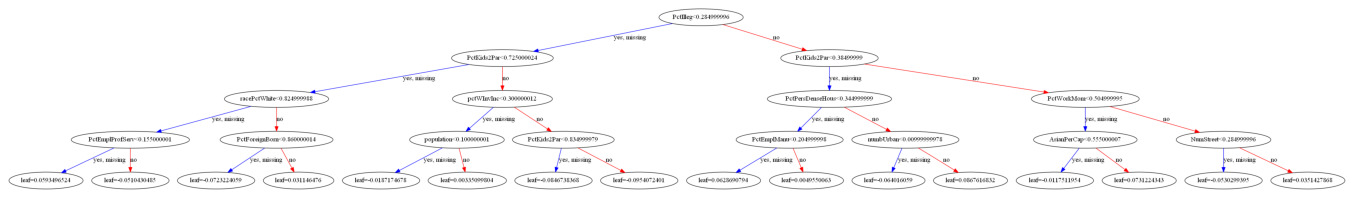

In [21]:
d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

xgb_clf = xgb.XGBRegressor(n_estimators=100, max_depth=4, objective="reg:squarederror", silent=False)

parameters = {'reg_alpha': [1e-5, 1e-4, 1e-3, 0.01, 0.1]}
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=10, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best parameters alpha :", grid_search.best_params_)

xgb.plot_tree(grid_search.best_estimator_, num_trees=1)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(24, 14)
matplotlib.pyplot.show()

In [22]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',max_depth = 4, n_estimators = 100,alpha=0.001)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.147453
